In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from classy import Class
from scipy.integrate import quad, quad_explain
from scipy.stats import binned_statistic

%matplotlib inline

In [2]:
# instantiating class and assigning to cosmo object
cosmo = Class()

In [242]:
# free up memory before changing params
cosmo.struct_cleanup()
# changing cosmology
cosmo.empty()

In [243]:
# defining cosmological parameters

params = dict(output = 'mPk',
              z_pk = .3,
              A_s = 2.3e-9,
              n_s = 0.9624, 
              h = 0.6711,
              omega_b = 0.022068,
              omega_cdm = 0.12029)
# setting params
cosmo.set(params)

True

In [244]:
# run code
cosmo.compute()

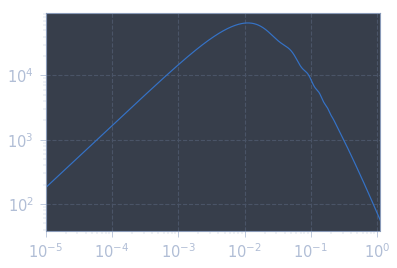

In [252]:
ks = np.logspace(-5,np.log10(1.118),1e5)
pk_lin = [cosmo.pk_lin(k,cosmo.pars['z_pk']) for k in ks]
plt.loglog(ks,pk_lin)

plt.xlim(ks.min(),ks.max())
plt.show()

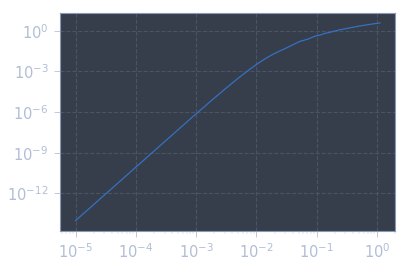

In [253]:
plt.loglog(ks,ks**3 * pk_lin /(2*np.pi**2))
plt.show()

Correlation function:
$$\xi(r) = \int \dfrac{dk}{2 \pi^2} k^2 P(k) \dfrac{\sin kr}{kr}$$

In [258]:
# integrand
def integrand(k, r, cosmo):
    """Integrand to get correlation function.
    Arguments:
     - k : float or array, scales to integrate over
     - r : float, comoving distance
     - cosmo : CLASS's computed instance."""
    z = cosmo.pars['z_pk']
    num = k*cosmo.pk(k,z)*np.sin(k*r)
    den = 2*(np.pi**2)*r
    return num/den

In [259]:
# correlation function
def xi(r,cosmo):
    int_r = lambda k: integrand(k,r,cosmo)
    return quad(int_r,0,1.118)[0]

xi = np.vectorize(xi)

In [260]:
def xi_binned(r, cosmo, bin_size=3):
    """r: array of positions to evalue correlation function over"""
    bins = np.arange(r.min(),r.max()+bin_size,bin_size)
    bin_means, bin_edges = binned_statistic(r,xi(r,cosmo),statistic='mean',bins=bins)[:2]
    bin_centers = bin_edges[1:] - bin_size/2
    return bin_centers, bin_means

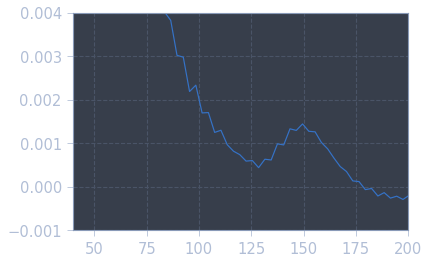

In [261]:
r = np.linspace(40,200,200)
#xi_r = xi(r,cosmo)
#plt.plot(r,xi_r)
#xi_bin, r_bin = xi_binned(r,xi_r)
plt.plot(*xi_binned(r,cosmo))
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(-0.001,0.004)
plt.xlim(r.min(),r.max())
plt.show()

To keep in mind (from 1711.09063):
- They bin the correlation function with bin size $\Delta s = 3 Mpc/h$
- They range over which the fit is done is $(s_{max} - s_{min}) \leq 70 Mpc/h$, but If I understand correctly, fitting over larger ranges would only improve the result.
- They fit with 5th order polynomials.